In [22]:
#importing all packages needed to run analysis successfully
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#from scipy import stats
import random


from zipfile import ZipFile
import os
import statistics

In [2]:
#check the working directory

In [3]:
pwd

'/Users/eishnar/Documents/Fall 2019/Psych27_Final_Project'

## Part 1 

In [4]:
#import datafile from the summer
#Note about the data: the valuation values were bounded between 0 and 40. We thought no one would want to pay more than 40 dollars for a gift card valued at 20 
#create funciton to clean up the data and remove any uncessary rows

def cleandata():
    data = pd.read_csv('Gift_cards_v4_Food_August+12,+2019_18.35.csv', header = 1)
    #need to delete first row since it's not useful. random noise from Qualtrics. 
    data = data.drop([0])
    print(data.shape)

    
    #create subset dataframe for stores
    stores = data[['amazon', 'dd', 'chipotle', 'dominos', 'mcd', 'panera', 'papaj',
       'pizzahut', 'starbucks', 'target', 'tacobell', 'walmart',]]
    #convert cell values in stores to numberic
    stores = stores.apply(pd.to_numeric)
    print(stores.shape)
    
    #create subset dataframe for demographics questions
    demographics = data[['Select your highest educational level achieved.',
       'What is your marital status? - Selected Choice',
       'Please specify your race or ethnicity. - Selected Choice',
       'How would you describe your socioeconomic background?',
       'How many cars does your family own?',
       'Please select your household income level.']]
    print(demographics.shape)

    return data, stores, demographics

In [62]:
data.head()

,rid,At which of these stores have you purchased a good or a service from in the past year? Mark ALL that apply.,Which of these stores is located within a 10-mile radius of your home or workplace? Mark ALL that apply.,amazon,dd,chipotle,dominos,mcd,panera,papaj,...,What is your gender? - A gender not listed above - Text,What is your favorite color?,Select your highest educational level achieved.,What is your marital status? - Selected Choice,What is your marital status? - A status not listed above - Text,Please specify your race or ethnicity. - Selected Choice,Please specify your race or ethnicity. - Other - Text,How would you describe your socioeconomic background?,How many cars does your family own?,Please select your household income level.
1,5d51aeaa-4262-d265-53d6-030fc310a3ae,"Amazon,Papa Johns,Target",Pizza Hut,5,NaN,NaN,NaN,NaN,NaN,5,...,NaN,pink,Bachelor’s degree,"Single, never married",NaN,"American Indian or Alaska Native,Asian",NaN,Upper-middle class,2,NaN
2,5d51b084-2843-b543-5851-2875eb3c26cb,"Dunkin' Donuts,McDonald's,Target","Dunkin' Donuts,Target,Walmart",NaN,10,NaN,NaN,18,NaN,NaN,...,NaN,Red,Associate's degree,"Single, never married",NaN,Asian,NaN,Middle class,2,"Less than $20,000"
3,5d51b0a6-cf28-7433-5bb1-1ce5e7c9a79a,"Dunkin' Donuts,McDonald's,Starbucks,Target","Dunkin' Donuts,McDonald's,Target",NaN,2,NaN,NaN,5,NaN,NaN,...,NaN,black,Bachelor’s degree,"Single, divorced",NaN,Asian,NaN,Lower-middle class,0,"Less than $20,000"
4,5d51b093-d146-41c8-cc7f-7f47e65bc394,"Amazon,Dunkin' Donuts,Starbucks,Target,Walmart","Chipotle,McDonald's,Pizza Hut,Starbucks,Target...",19,17,NaN,NaN,NaN,NaN,NaN,...,NaN,Blue,Associate's degree,Married,NaN,White,NaN,Middle class,2,"$50,000 to $74,999"
5,5d51b0bc-e144-f036-1839-ff6d30abe4a7,"Amazon,Panera Bread,Starbucks,Target,Walmart","Chipotle,Dominos,McDonald's,Panera Bread,Papa ...",19.5,NaN,NaN,NaN,NaN,18,NaN,...,NaN,Green,Master’s degree,Married,NaN,White,NaN,Upper-middle class,2,"$150,000 or greater"


In [5]:
data, stores, demographics = cleandata()

(266, 27)
(266, 12)
(266, 6)


In [6]:
index = data.index
columns = data.columns
values = data.values

In [7]:
#check column names to see what's what
columns

Index(['rid',
       'At which of these stores have you purchased a good or a service from in the past year? Mark ALL that apply.',
       'Which of these stores is located within a 10-mile radius of your home or workplace? Mark ALL that apply.',
       'amazon', 'dd', 'chipotle', 'dominos', 'mcd', 'panera', 'papaj',
       'pizzahut', 'starbucks', 'target', 'tacobell', 'walmart',
       'What is your age?', 'What is your gender? - Selected Choice',
       'What is your gender? - A gender not listed above - Text',
       'What is your favorite color?',
       'Select your highest educational level achieved.',
       'What is your marital status? - Selected Choice',
       'What is your marital status? - A status not listed above - Text',
       'Please specify your race or ethnicity. - Selected Choice',
       'Please specify your race or ethnicity. - Other - Text',
       'How would you describe your socioeconomic background?',
       'How many cars does your family own?',
       'Ple

In [8]:
data.head()

,rid,At which of these stores have you purchased a good or a service from in the past year? Mark ALL that apply.,Which of these stores is located within a 10-mile radius of your home or workplace? Mark ALL that apply.,amazon,dd,chipotle,dominos,mcd,panera,papaj,...,What is your gender? - A gender not listed above - Text,What is your favorite color?,Select your highest educational level achieved.,What is your marital status? - Selected Choice,What is your marital status? - A status not listed above - Text,Please specify your race or ethnicity. - Selected Choice,Please specify your race or ethnicity. - Other - Text,How would you describe your socioeconomic background?,How many cars does your family own?,Please select your household income level.
1,5d51aeaa-4262-d265-53d6-030fc310a3ae,"Amazon,Papa Johns,Target",Pizza Hut,5,NaN,NaN,NaN,NaN,NaN,5,...,NaN,pink,Bachelor’s degree,"Single, never married",NaN,"American Indian or Alaska Native,Asian",NaN,Upper-middle class,2,NaN
2,5d51b084-2843-b543-5851-2875eb3c26cb,"Dunkin' Donuts,McDonald's,Target","Dunkin' Donuts,Target,Walmart",NaN,10,NaN,NaN,18,NaN,NaN,...,NaN,Red,Associate's degree,"Single, never married",NaN,Asian,NaN,Middle class,2,"Less than $20,000"
3,5d51b0a6-cf28-7433-5bb1-1ce5e7c9a79a,"Dunkin' Donuts,McDonald's,Starbucks,Target","Dunkin' Donuts,McDonald's,Target",NaN,2,NaN,NaN,5,NaN,NaN,...,NaN,black,Bachelor’s degree,"Single, divorced",NaN,Asian,NaN,Lower-middle class,0,"Less than $20,000"
4,5d51b093-d146-41c8-cc7f-7f47e65bc394,"Amazon,Dunkin' Donuts,Starbucks,Target,Walmart","Chipotle,McDonald's,Pizza Hut,Starbucks,Target...",19,17,NaN,NaN,NaN,NaN,NaN,...,NaN,Blue,Associate's degree,Married,NaN,White,NaN,Middle class,2,"$50,000 to $74,999"
5,5d51b0bc-e144-f036-1839-ff6d30abe4a7,"Amazon,Panera Bread,Starbucks,Target,Walmart","Chipotle,Dominos,McDonald's,Panera Bread,Papa ...",19.5,NaN,NaN,NaN,NaN,18,NaN,...,NaN,Green,Master’s degree,Married,NaN,White,NaN,Upper-middle class,2,"$150,000 or greater"


In [19]:
stores.head()

,amazon,dd,chipotle,dominos,mcd,panera,papaj,pizzahut,starbucks,target,tacobell,walmart
1,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN
2,NaN,10.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN
3,NaN,2.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN
4,19.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,19.0
5,19.5,NaN,NaN,NaN,NaN,18.0,NaN,NaN,16.0,20.0,NaN,16.0


In [20]:
#np.maximum(data.amazon)
stores.amazon.min()

0.0

## Part 1b

In [11]:
demographics.head()

,Select your highest educational level achieved.,What is your marital status? - Selected Choice,Please specify your race or ethnicity. - Selected Choice,How would you describe your socioeconomic background?,How many cars does your family own?,Please select your household income level.
1,Bachelor’s degree,"Single, never married","American Indian or Alaska Native,Asian",Upper-middle class,2,NaN
2,Associate's degree,"Single, never married",Asian,Middle class,2,"Less than $20,000"
3,Bachelor’s degree,"Single, divorced",Asian,Lower-middle class,0,"Less than $20,000"
4,Associate's degree,Married,White,Middle class,2,"$50,000 to $74,999"
5,Master’s degree,Married,White,Upper-middle class,2,"$150,000 or greater"


In [71]:
columns = demographics.columns
print(columns)
SES = columns[3]

Index(['Select your highest educational level achieved.',
       'What is your marital status? - Selected Choice',
       'Please specify your race or ethnicity. - Selected Choice',
       'How would you describe your socioeconomic background?',
       'How many cars does your family own?',
       'Please select your household income level.'],
      dtype='object')


In [72]:
type(demographics_copy[SES])
stores_copy = stores.copy()
stores_copy['average'] = stores_copy.mean(numeric_only=True, axis=1)

In [73]:
stores_copy.head()

,amazon,dd,chipotle,dominos,mcd,panera,papaj,pizzahut,starbucks,target,tacobell,walmart,average
1,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.000000
2,NaN,10.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,15.333333
3,NaN,2.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,4.250000
4,19.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,19.0,18.200000
5,19.5,NaN,NaN,NaN,NaN,18.0,NaN,NaN,16.0,20.0,NaN,16.0,17.900000


In [74]:
print(len(stores_copy))
stores_copy = stores_copy.set_index("average")

stores_copy = stores_copy.drop(642.5, axis=0)
print(len(stores_copy))

266
265


In [75]:
stores_copy = stores_copy.reset_index()

In [61]:
demographics_copy = demographics.copy()
demographics_copy = demographics_copy.iloc[1:,]

#demographics_copy = demographics_copy.drop([0], axis = 0)

In [76]:
len(demographics_copy)

265

In [65]:
demographics_copy.head()

,Select your highest educational level achieved.,What is your marital status? - Selected Choice,Please specify your race or ethnicity. - Selected Choice,How would you describe your socioeconomic background?,How many cars does your family own?,Please select your household income level.
2,Associate's degree,"Single, never married",Asian,Middle class,2,"Less than $20,000"
3,Bachelor’s degree,"Single, divorced",Asian,Lower-middle class,0,"Less than $20,000"
4,Associate's degree,Married,White,Middle class,2,"$50,000 to $74,999"
5,Master’s degree,Married,White,Upper-middle class,2,"$150,000 or greater"
6,Associate's degree,"Single, divorced",White,Middle class,2,"$20,000 to $34,999"


In [54]:
stores_copy.head()

,average,amazon,dd,chipotle,dominos,mcd,panera,papaj,pizzahut,starbucks,target,tacobell,walmart
0,5.000000,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN
1,15.333333,NaN,10.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN
2,4.250000,NaN,2.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN
3,18.200000,19.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,19.0
4,17.900000,19.5,NaN,NaN,NaN,NaN,18.0,NaN,NaN,16.0,20.0,NaN,16.0


x = np.array(demographics_copy[SES])
y = np.array(stores_copy['average'])
#print(max(y))
plt.scatter(x, y, c="purple")
plt.xlabel("class")
plt.ylabel("valuation")
#plt.xticks(ticks, [labels], **kwargs)

Text(0, 0.5, 'valuation')

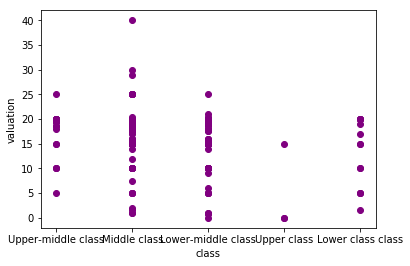

In [78]:
x = np.array(demographics[SES])
y = np.array(stores['amazon'])
#print(max(y))
plt.scatter(x, y, c="purple")
plt.xlabel("class")
plt.ylabel("valuation")
#plt.xticks(ticks, [labels], **kwargs)

## Part 2

In [74]:
def storespecialty():
    
    american = stores[['mcd', 'panera']]
    coffee = stores[['dd', 'starbucks']]
    mexican = stores[['tacobell', 'chipotle']]
    
    
    return american, coffee, mexican

In [77]:
american, coffee, mexican = storespecialty()

In [103]:
american.head()

,mcd,panera
1,NaN,NaN
2,18.0,NaN
3,5.0,NaN
4,NaN,NaN
5,NaN,18.0


In [1]:
#mexican.to_numpy()

In [107]:
mexican.columns[0]

'tacobell'

In [118]:
x = [american, coffee, mexican]
#print(x)

In [135]:
def ttests():
    x = [american, coffee, mexican]
    ttest = []
    
    for item in x:
        #print(item)
        p = item[item.columns[0]]
        q = item[item.columns[1]]
        p = np.array(p)
        q = np.array(q)
        
        print(p.shape)
        print(q.shape)
        t = st.ttest_ind(p, q, equal_var=True, nan_policy='omit')
        print(t)
        ttest.append(t)

    return ttest

In [136]:
r = ttests()

(266,)
(266,)
Ttest_indResult(statistic=-1.7252231063528547, pvalue=0.08556000395737545)
(266,)
(266,)
Ttest_indResult(statistic=-0.777966430455912, pvalue=0.43728544825425475)
(266,)
(266,)
Ttest_indResult(statistic=-0.846274061302027, pvalue=0.3983030281898039)


In [113]:
st.ttest_ind(f, g, equal_var=True, nan_policy='omit')

#st.ttest_ind((f,g), nan_policy='omit')

Ttest_indResult(statistic=-0.846274061302027, pvalue=0.3983030281898039)

In [80]:
"""for x in listofname:
    l.append(stats.ttest_ind(df[x],df2[x], equal_var=False))"""

mcd
panera


In [81]:
def calculateaverages():
    
    averages = []
    stds = []
    for store in stores:
        print(store)
        f = stores[store]
        f = np.array(f)
        average = np.nanmean(f)
        std_dev = np.nanstd(f)
        print("avg: %f" %average)
        print("std: %f" %std_dev)
        averages.append(average)
        stds.append(std_dev)
        
    results = pd.DataFrame(list(zip(stores, averages, stds)), 
               columns =['Store', 'Average', 'Standard Deviation',])
    return results

In [73]:
results = calculateaverages()

amazon
avg: 16.202765
std: 6.074140
dd
avg: 15.085470
std: 6.416609
chipotle
avg: 15.547397
std: 5.783804
dominos
avg: 40.895798
std: 272.460915
mcd
avg: 14.998544
std: 6.095858
panera
avg: 16.369048
std: 6.162178
papaj
avg: 15.396923
std: 5.382113
pizzahut
avg: 33.362710
std: 191.093093
starbucks
avg: 15.656510
std: 5.498445
target
avg: 15.996864
std: 5.576180
tacobell
avg: 14.873464
std: 5.470321
walmart
avg: 15.820814
std: 5.921733


AttributeError: 'DataFrame' object has no attribute 'upper'

In [71]:
results

,Store,Average,Standard Deviation
0,amazon,16.202765,6.074140
1,dd,15.085470,6.416609
2,chipotle,15.547397,5.783804
3,dominos,40.895798,272.460915
4,mcd,14.998544,6.095858
5,panera,16.369048,6.162178
6,papaj,15.396923,5.382113
7,pizzahut,33.362710,191.093093
8,starbucks,15.656510,5.498445
9,target,15.996864,5.576180


In [53]:
type(data.amazon[5])

str

## Part 3

In [1]:
from zipfile import ZipFile
import os
from psychopy import visual, core, event
import random

In [15]:
pwd

'/Users/eishnar/Documents/Fall 2019/Psych27_Final_Project'

In [2]:
def cleanimages():
    
    #import the images to be used
    with ZipFile("GC_photos.zip", 'r') as zip:
        #zip.printdir() 

        #print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 
        
        z = zip.namelist()
        print(z)
        z = z[::2]
        z = z[2:]
        
    return z
    

In [3]:
images = cleanimages()

Done!
['GC_photos/', 'GC_photos/panera.jpeg', '__MACOSX/', '__MACOSX/GC_photos/', '__MACOSX/GC_photos/._panera.jpeg', 'GC_photos/.DS_Store', '__MACOSX/GC_photos/._.DS_Store', 'GC_photos/dominos.png', '__MACOSX/GC_photos/._dominos.png', 'GC_photos/stabucks_internet.png', '__MACOSX/GC_photos/._stabucks_internet.png', 'GC_photos/target.jpg', '__MACOSX/GC_photos/._target.jpg', 'GC_photos/pizzA_hut.png', '__MACOSX/GC_photos/._pizzA_hut.png', 'GC_photos/papa_johns.jpg', '__MACOSX/GC_photos/._papa_johns.jpg', 'GC_photos/amazon_nocom.jpg', '__MACOSX/GC_photos/._amazon_nocom.jpg', 'GC_photos/tcb.png', '__MACOSX/GC_photos/._tcb.png', 'GC_photos/walmart.jpeg', '__MACOSX/GC_photos/._walmart.jpeg', 'GC_photos/dd.png', '__MACOSX/GC_photos/._dd.png', 'GC_photos/chipotle.png', '__MACOSX/GC_photos/._chipotle.png', 'GC_photos/mcd_better.jpg', '__MACOSX/GC_photos/._mcd_better.jpg', '__MACOSX/._GC_photos']


In [4]:
images

['__MACOSX/GC_photos/._panera.jpeg',
 '__MACOSX/GC_photos/._.DS_Store',
 '__MACOSX/GC_photos/._dominos.png',
 '__MACOSX/GC_photos/._stabucks_internet.png',
 '__MACOSX/GC_photos/._target.jpg',
 '__MACOSX/GC_photos/._pizzA_hut.png',
 '__MACOSX/GC_photos/._papa_johns.jpg',
 '__MACOSX/GC_photos/._amazon_nocom.jpg',
 '__MACOSX/GC_photos/._tcb.png',
 '__MACOSX/GC_photos/._walmart.jpeg',
 '__MACOSX/GC_photos/._dd.png',
 '__MACOSX/GC_photos/._chipotle.png',
 '__MACOSX/GC_photos/._mcd_better.jpg']

In [5]:
"""for i, image in enumerate(images):
    print(image)
    image = image[8:]
    images[i] = image
    print("next")
    print(image)"""

'for i, image in enumerate(images):\n    print(image)\n    image = image[8:]\n    images[i] = image\n    print("next")\n    print(image)'

In [6]:
len(images)

13

In [7]:
#this is to check for valid key presses for the gift card valuation by the subject. the range we used for the experiment was capped between 0 and 40
def validinput():
    numbers = []
    for i in range(41):
        #print(i+1)
        i = str(i)
        #print(i)
        numbers.append(i)
    return numbers

In [8]:
numbers = validinput()
print(numbers)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']


In [11]:
def presentimages(y, pres_lenth=4.0):
    
    valuation = []
    
    win = visual.Window([500,500],pos=[200,200])
    #win2 = visual.Window([500,500],pos=[0,0], color=(0, 150, 0))
    
    random.shuffle(y)
    numbers = validinput()
    
    for item in y:
        print(item)
        #item = item[8:]
        stimulus = visual.ImageStim(win,image="GC_photos/mcd_better.jpg", size = [1.5,1])
        stimulus.draw()
        win.flip()
        
        core.wait(pres_lenth)
        
        blank = visual.TextStim(win,text="+",pos = [1,0])
        blank.draw()
        win.flip()
        
        message = visual.TextStim(win, text = "how much would you pay for this card?", pos=[.5,0])
        message.draw()
        win.flip()
        price = event.waitKeys(keyList = numbers)
        print(price)
        valuation.append(price)
        
        core.wait(0.5)

    win.close()


In [12]:
presentimages(images)

__MACOSX/GC_photos/._dd.png


KeyboardInterrupt: 